<a href="https://colab.research.google.com/github/claudevandort/UAI-MachineLearning/blob/master/01_IntroML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aprendizaje Automático

#### Profesor: Gonzalo Ruz
#### Ayudante: Anthony Cho

**Tema**: Introducción a ML (scikit-learn)

### En la práctica
* Construyamos un modelo simple para el conjunto de datos [Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)
* Usaremos **scikit-learn**
    * Contiene muchos algoritmos de aprendizaje automático de última generación.
    * Disponible [documentación fácil de seguir](http://scikit-learn.org/stable/documentation) sobre cada algoritmo
    * Actualmente muy popular, existen varios [tutoriales](http://scikit-learn.org/stable/user_guide.html) y fragmentos de código están disponibles 
    * Funciona bien con numpy, scipy, pandas, matplotlib,...

### Importación de datos
Múltiples opciones:

* Se incluyen algunos conjuntos de datos de juguetes en `sklearn.datasets`
* Importación de [1000s de machine learning datasets desde OpenML](http://www.openml.org) con `sklearn.datasets.fetch_openml`
* Puede importar archivos de datos (CSV) con `pandas` o `numpy`

Iris está incluido en scikitlearn, así que podemos cargarla directamente. 

Esto devolverá un objeto `Bunch` (similar a `dict`)

``` python
iris_dataset = load_iris()
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
```

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'] + "\n...")

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal 

Los objetivos (clases) y las características se almacenan como `list`s, los datos como` ndarray`

``` python
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))
```

In [2]:
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Los objetivos se almacenan por separado como un `ndarray`, con índices que apuntan a las características

``` python
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))
```

In [3]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))

Target names: ['setosa' 'versicolor' 'virginica']
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Construyendo (fitting) modelos
Todos los estimadores scikit-learn siguen el mismo interfaz (esquema)

```python
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score
```

### datos de entrenamiento y prueba
Para evaluar nuestro clasificador, necesitamos probarlo en datos no vistos.  
`train_test_split`: divide datos aleatoriamente en un 75% de entrenamiento y un 25% de datos de prueba.

``` python
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
```

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Nota: hay varios problemas con este enfoque que discutiremos más adelante:

* ¿Por qué 75%? ¿Hay mejores formas de dividirse?
* ¿Qué pasa si una división aleatoria produce modelos diferentes que otro?
* ¿Qué pasa si todos los ejemplos de una clase terminan en el conjunto de entrenamiento / prueba?

### Mirando los datos (con pandas)

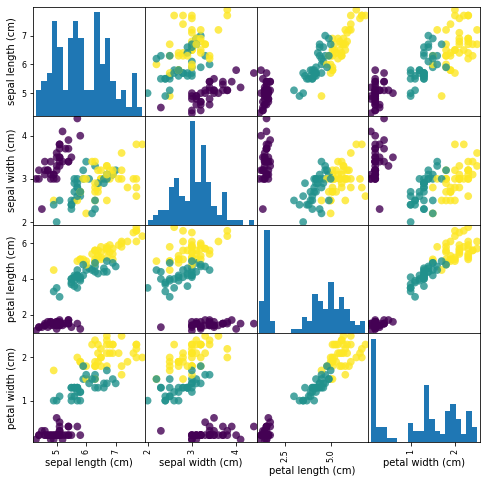

In [5]:
import pandas as pd
from pandas.plotting import scatter_matrix

# Build a DataFrame with training examples and feature names
iris_df = pd.DataFrame(X_train, 
                       columns=iris_dataset.feature_names)

# scatter matrix from the dataframe, color by class
sm = scatter_matrix(iris_df, c=y_train, figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, s=60, 
                  alpha=.8)

### Entrenando (Fitting) un modelo

El primer modelo que construiremos se llama k-Nearest Neighbour, o kNN. Más sobre este modelo pronto.  
kNN está incluido en `sklearn.neighbors`, así que construyamos nuestro primer modelo

``` python
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
```

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Haciendo predicciones
Creemos un nuevo ejemplo y solicitemos al modelo kNN que lo clasifique

``` python
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
```

In [7]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluando el modelo
Alimentar todos los ejemplos de prueba al modelo produce todas las predicciones

``` python
y_pred = knn.predict(X_test)
```

In [8]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


Ahora podemos contar qué porcentaje fue correcto o usar `score`

``` python
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))
```

In [9]:
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97
Score: 0.97


# k-Nearest Neighbor

* La construcción del modelo consiste solo en almacenar el conjunto de datos de entrenamiento
* Para hacer una predicción, el algoritmo encuentra los _k_ puntos de datos más cercanos en el conjunto de datos de entrenamiento
    * Clasificación: predecir la clase más frecuente de los k vecinos
    * Regresión: predecir el promedio de los valores de los k vecinos
    * Ambos pueden ser ponderados por la distancia a cada vecino
* Hiperparámetros principales:
    * Número de vecinos (k). Actúa como un regularizador.
    * Elección de la función de distancia (por ej., Euclidiana)
    * Esquema de ponderación (uniforme, distancia, ...)
* Model:
    - Representación: Almacenar ejemplos de entrenamiento (por ejemplo, en KD-tree)
    - Funciones de pérdida típicas:
        * Clasificación: Accuracy (Zero-One Loss)
        * Regresión: Root mean squared error
    - Optimización: No tiene (no hay parámetros del modelo para ajustar)

## Clasificación k-Nearest Neighbor
para k = 1: devuelve la clase del vecino más cercano

In [10]:
! pip install mglearn;

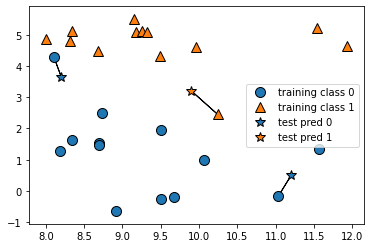

In [11]:
import mglearn
import warnings
warnings.filterwarnings('ignore')
mglearn.plots.plot_knn_classification(n_neighbors=1)

para k> 1: por votación y devuelve la mayoría (o un valor de confianza para cada clase)

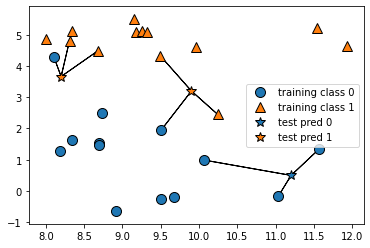

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Construyamos un modelo kNN para este conjunto de datos (llamado 'Forge')

``` python
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
```

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.86


#### Análisis
Podemos dibujar la predicción para cada entrada posible para ver la *frontera de decisión*

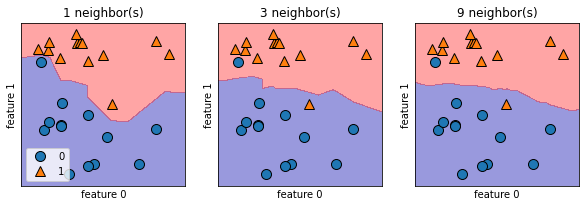

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Usar pocos vecinos corresponde a una alta complejidad del modelo (izquierda), y usar muchos vecinos corresponde a una baja complejidad del modelo y una frontera de decisión más suave (derecha).

Podemos medir más directamente el efecto en el entrenamiento y el error de prueba en un conjunto de datos más grande (breast_cancer)

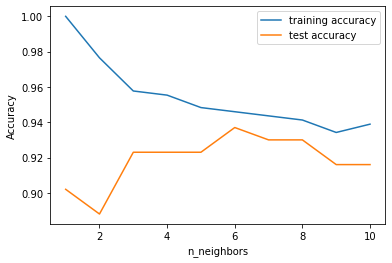

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

Para un pequeño número de vecinos, el modelo es demasiado complejo y sobreajusta los datos de entrenamiento. A medida que se consideran más vecinos, el modelo se vuelve más simple y la precisión del entrenamiento disminuye, pero la precisión de la prueba aumenta, hasta cierto punto. Después de aproximadamente 8 vecinos, el modelo comienza a volverse demasiado simple (underfits) y la precisión de la prueba vuelve a caer.

## Regresión k-Neighbors
para k = 1: devuelve el valor objetivo del vecino más cercano

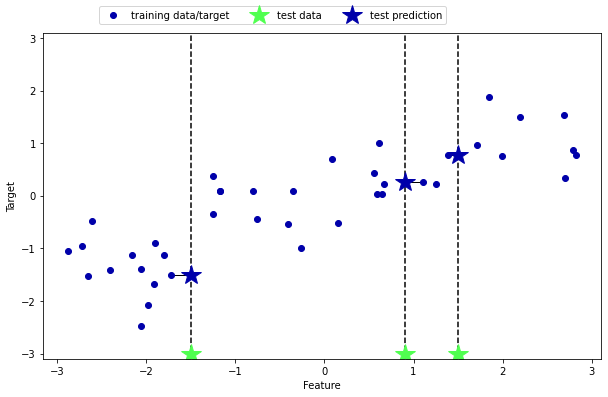

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

para k> 1: devuelve el _promedio_ de los valores objetivo de los k vecinos más cercanos

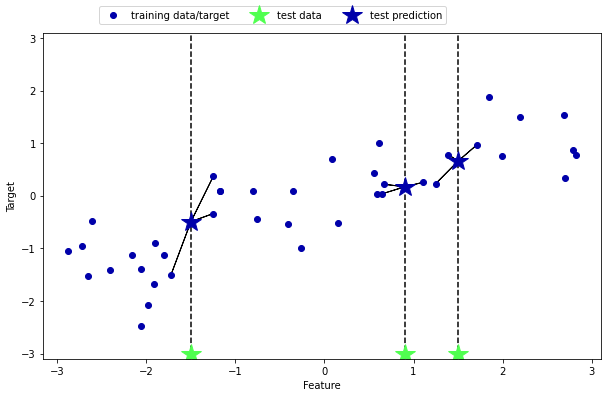

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Para hacer la regresión, simplemente use `KNeighboursRegressor` 

``` python
X, y = mglearn.datasets.make_wave(n_samples=40))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
```

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

La función de puntuación predeterminada para los modelos de regresión es $R^{2}$. El valor óptimo es 1. Los valores negativos significan que las predicciones son peores que solo predecir la media.

In [20]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Análisis
De nuevo podemos generar las predicciones para cada entrada posible, para diferentes valores de _k_.

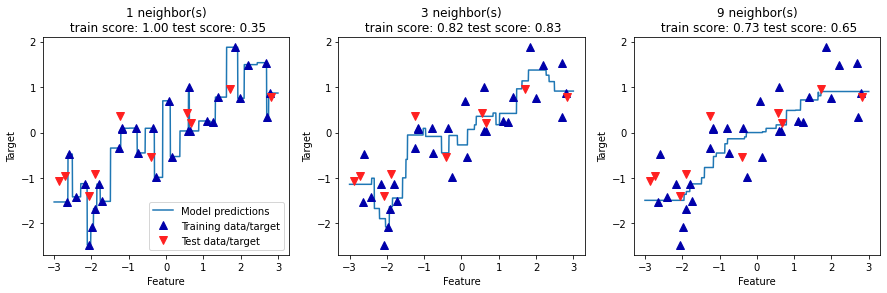

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Vemos que un pequeño _k_ conduce a un modelo demasiado complejo (overfitting), mientras que un _k_ más grande produce un ajuste más suave. Un _k_ demasiado grande produce un sub-ajuste (underfitting).

## kNN: Fortalezas, debilidades y parámetros.
* Fácil de entender, funciona bien en muchos entornos.
* El entrenamiento es muy rápido, la predicción es lenta para grandes conjuntos de datos
* Malo en datos de alta dimensión y dispersos/sparse (maldición de dimensionalidad)

## Resumen

- Usamos scikit-learn para construir nuestro primer modelo
- Conocimos nuestro primer algoritmo (kNN)